# Práctico 3

Espacio de prueba

In [2]:
import pandas as pd
import pyvo
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

In [4]:
query = "SELECT * FROM exoplanet.epn_core WHERE semi_major_axis < 5"

In [5]:
results = service.search(query=query).to_table().to_pandas()


KeyboardInterrupt: 

In [ ]:
results

,granule_uid,granule_gid,obs_id,dataproduct_type,target_name,target_class,time_min,time_max,time_sampling_step_min,time_sampling_step_max,...,star_metallicity,star_mass,star_radius,star_age,star_teff,magnetic_field,detected_disc,ra,dec,external_link
0,109 Psc b,exoplanet_catalog,95,ci,109 Psc b,exoplanet,NaN,NaN,NaN,NaN,...,0.10,1.130,1.79000,6.90,5600.0,False,,26.232600,20.083150,http://exoplanet.eu/catalog/109_psc_b--95
1,112 Psc b,exoplanet_catalog,9287,ci,112 Psc b,exoplanet,NaN,NaN,NaN,NaN,...,0.31,1.100,1.80100,NaN,5986.0,False,,30.038165,3.097014,http://exoplanet.eu/catalog/112_psc_b--9287
2,11 Com Ab,exoplanet_catalog,882,ci,11 Com Ab,exoplanet,NaN,NaN,NaN,NaN,...,-0.35,2.700,19.00000,NaN,4742.0,False,,185.179167,17.792778,http://exoplanet.eu/catalog/11_com_ab--882
3,11 UMi b,exoplanet_catalog,575,ci,11 UMi b,exoplanet,NaN,NaN,NaN,NaN,...,0.04,1.800,24.08000,1.56,4340.0,False,,229.275000,71.823889,http://exoplanet.eu/catalog/11_umi_b--575
4,14 And Ab,exoplanet_catalog,489,ci,14 And Ab,exoplanet,NaN,NaN,NaN,NaN,...,-0.24,2.200,11.00000,NaN,4813.0,False,,352.820833,39.236111,http://exoplanet.eu/catalog/14_and_ab--489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,YZ Cet d,exoplanet_catalog,6605,ci,YZ Cet d,exoplanet,NaN,NaN,NaN,NaN,...,-0.26,0.130,0.16800,4.00,3056.0,False,,18.127083,-16.998889,http://exoplanet.eu/catalog/yz_cet_d--6605
4800,ZTF J0038+2030 b,exoplanet_catalog,7860,ci,ZTF J0038+2030 b,exoplanet,NaN,NaN,NaN,NaN,...,NaN,0.505,0.01429,8.00,10900.0,False,,9.729167,20.507222,http://exoplanet.eu/catalog/ztf_j0038_2030_b--...
4801,ZTF J1230-2655 b,exoplanet_catalog,10892,ci,ZTF J1230-2655 b,exoplanet,NaN,NaN,NaN,NaN,...,NaN,0.650,0.01230,NaN,10000.0,False,,187.569125,-26.930928,http://exoplanet.eu/catalog/ztf_j1230_2655_b--...
4802,ZTF J1406+1222 Ab,exoplanet_catalog,9281,ci,ZTF J1406+1222 Ab,exoplanet,NaN,NaN,NaN,NaN,...,NaN,1.400,0.00002,NaN,NaN,False,,211.734058,12.378722,http://exoplanet.eu/catalog/ztf_j1406_1222_ab-...


In [7]:
len(results)

4804

Se genera una tabla de exoplanetas con las categorías masa, periodo orbital y tipo de estrella del sistema.

In [6]:
query="SELECT TOP 10 mass,period,star_spec_type  FROM exoplanet.epn_core"

In [7]:
results = service.search(query=query).to_table().to_pandas()

In [8]:
results

,mass,period,star_spec_type
0,5.743,1075.40,G5 IV
1,NaN,4.40,G0IV
2,9.866,36336.70,G0IV
3,NaN,326.03,G8III
4,NaN,516.22,K4III
5,NaN,185.84,K0III
6,8.900,1767.56,K0 V
7,7.900,52160.00,K0 V
8,NaN,799.50,G2.5 V
9,NaN,993.30,G6III


In [9]:
query = "SELECT target_name, mass, period, star_spec_type, star_mass, detection_type, star_distance, semi_major_axis, radius, star_age FROM exoplanet.epn_core"

In [10]:
results = service.search(query=query).to_table().to_pandas()

In [11]:
results

,target_name,mass,period,star_spec_type,star_mass,detection_type,star_distance,semi_major_axis,radius,star_age
0,109 Psc b,5.743,1075.400000,G5 IV,1.13,Radial Velocity#Astrometry,32.5600,2.05100,1.152,6.90
1,112 Psc b,NaN,4.400000,G0IV,1.10,Radial Velocity,31.7627,0.05400,NaN,NaN
2,112 Psc c,9.866,36336.700000,G0IV,1.10,Radial Velocity#Astrometry,31.7627,22.21000,NaN,NaN
3,11 Com Ab,NaN,326.030000,G8III,2.70,Radial Velocity,110.6000,1.29000,NaN,NaN
4,11 UMi b,NaN,516.220000,K4III,1.80,Radial Velocity,119.5000,1.54000,NaN,1.56
...,...,...,...,...,...,...,...,...,...,...
7765,ZTF J1230-2655 b,22.100,0.235978,DA,0.65,Primary Transit,193.0000,0.00650,1.260,NaN
7766,ZTF J1406+1222 Ab,50.000,0.054057,PSR,1.40,Pulsar,1400.0000,0.00272,0.292,NaN
7767,ZTF J1637+49 b,23.000,0.043000,DA,0.90,Primary Transit,207.0000,NaN,0.680,NaN
7768,ZTF J1828+2308 b,19.500,0.112007,DA,0.61,Primary Transit,204.0000,0.00388,1.020,NaN


### Ejercicio 2
Se estudia la distribución de ́ındices de masas y períodos orbitales para planetas descubiertos con diferentes técnicas observacionales. Se determine la existencia de un sesgo en las propiedades de los exoplanetas en función del tipo de técnica utilizada.

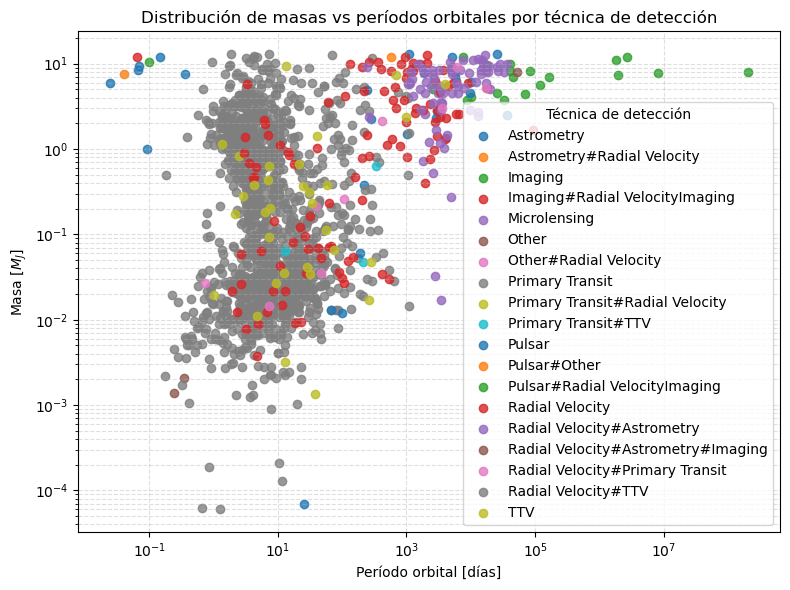

detection_type
Primary Transit                       1608
Radial Velocity                        107
Radial Velocity#Astrometry              69
TTV                                     25
Pulsar                                  20
Imaging                                 19
Microlensing                             9
Primary Transit#Radial Velocity          7
Radial Velocity#Primary Transit          7
Other                                    5
Astrometry                               5
Primary Transit#TTV                      3
Radial Velocity#TTV                      2
Other#Radial Velocity                    2
Radial Velocity#Astrometry#Imaging       1
Astrometry#Radial Velocity               1
Imaging#Radial VelocityImaging           1
Pulsar#Other                             1
Pulsar#Radial VelocityImaging            1
Name: count, dtype: int64

In [32]:
import matplotlib.pyplot as plt

df = results.copy() #creamos una copia del dataframe original
df = df[(df["mass"] < 13) & (df["mass"] > 1e-6)]  # solo planetas con masa < 13
df = df.dropna(subset=["mass", "period", "detection_type"])  #dropna() es un método de pandas para eliminar valores faltantes
                                                             #subset=[...] le indica en qué columnas mirar.

plt.figure(figsize=(8,6))
for det_type, subset in df.groupby("detection_type"):
    plt.scatter(subset["period"], subset["mass"], label=det_type, alpha=0.8)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Período orbital [días]")
plt.ylabel("Masa [$M_J$]")
plt.title("Distribución de masas vs períodos orbitales por técnica de detección")
plt.legend(title="Técnica de detección", loc="best")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.tight_layout()
#plt.savefig("masas_períodos.pdf")
plt.show() 
#contar cuantos planetas hay de cada tipo de detección
df["detection_type"].value_counts()



### Ejercicio 3
Se estudia la distribución de distancias a las estrellas con exoplanetas y se determina si la misma es consistente con una distribución gaussiana.

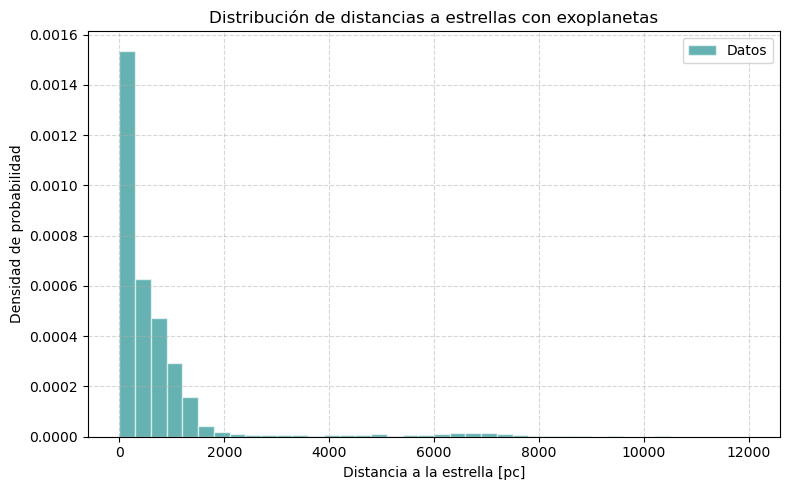

In [26]:
df2 = results.copy()
dist = df2["star_distance"].dropna()
dist = dist[dist > 0]  # eliminamos distancias no físicas

mu, sigma = np.mean(dist), np.std(dist)

plt.figure(figsize=(8,5))
count, bins, _ = plt.hist(dist, bins=40, density=True, alpha=0.6, color='teal', edgecolor='white', label="Datos")

plt.xlabel("Distancia a la estrella [pc]")
plt.ylabel("Densidad de probabilidad")
plt.title("Distribución de distancias a estrellas con exoplanetas")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("distancias.pdf")
plt.show()



### Ejercicio 4
Se realiza un gráfico de las masas y los radios de los planetas, luego se propone un modelo y se realiza un
ajuste de ese modelo. Se discute el procedimiento para el ajuste del modelo.

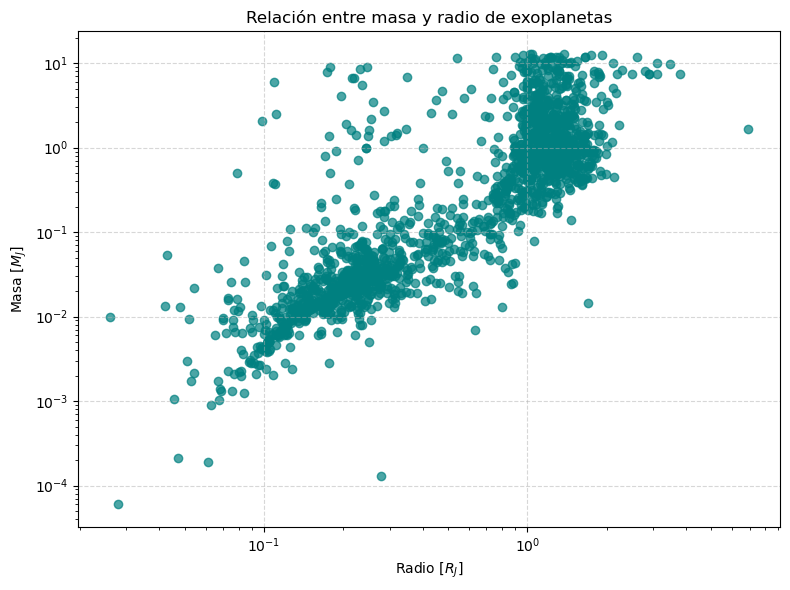

In [27]:
df3 = results.copy()
df3 = df3.dropna(subset=["mass", "radius"])
df3 = df3[(df3["mass"] > 1e-6) & (df3["mass"] < 13) & (df3["radius"] > 0)]


plt.figure(figsize=(8,6))
plt.scatter(df3["radius"], df3["mass"], alpha=0.7, color="teal")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Masa [$M_J$]")
plt.xlabel("Radio [$R_J$]")
plt.title("Relación entre masa y radio de exoplanetas")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("masa_radio_log_ambos.pdf")
plt.show()

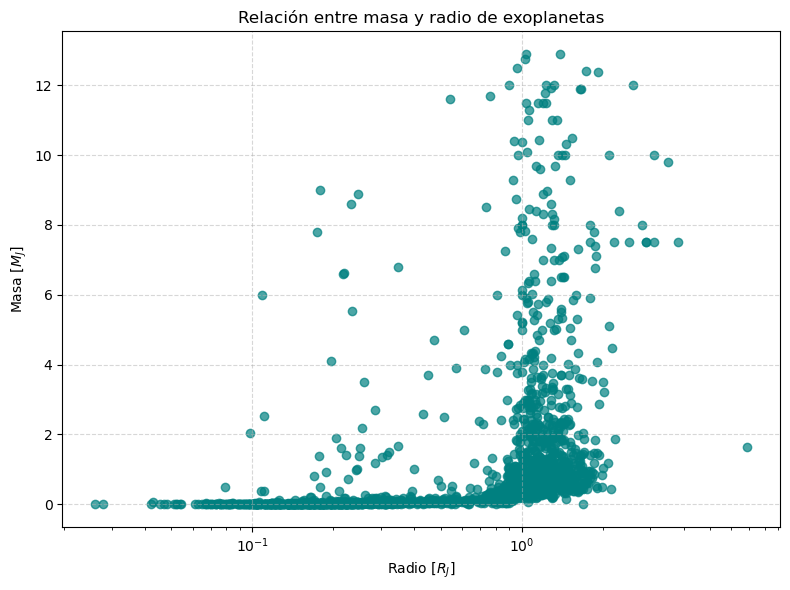

In [28]:
df3 = results.copy()
df3 = df3.dropna(subset=["mass", "radius"])
df3 = df3[((df3["mass"] > 1e-6)) & (df3["mass"] < 13) & (df3["radius"] > 0)]


plt.figure(figsize=(8,6))
plt.scatter(df3["radius"], df3["mass"], alpha=0.7, color="teal")
plt.xscale("log")
#plt.yscale("log")
plt.ylabel("Masa [$M_J$]")
plt.xlabel("Radio [$R_J$]")
plt.title("Relación entre masa y radio de exoplanetas")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("masa_radio_log_x.pdf")
plt.show()

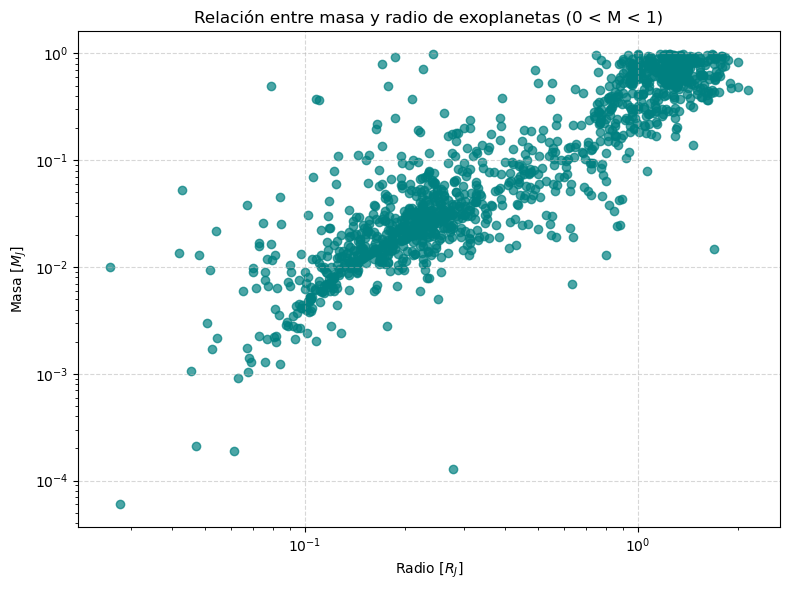

In [22]:
df3 = results.copy()
df3 = df3.dropna(subset=["mass", "radius"])
df3 = df3[((df3["mass"] > 1e-6)) & (df3["mass"] < 1) & (df3["radius"] > 0)]


plt.figure(figsize=(8,6))
plt.scatter(df3["radius"], df3["mass"], alpha=0.7, color="teal")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Masa [$M_J$]")
plt.xlabel("Radio [$R_J$]")
plt.title("Relación entre masa y radio de exoplanetas (0 < M < 1)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("masa_radio.pdf")
plt.show()


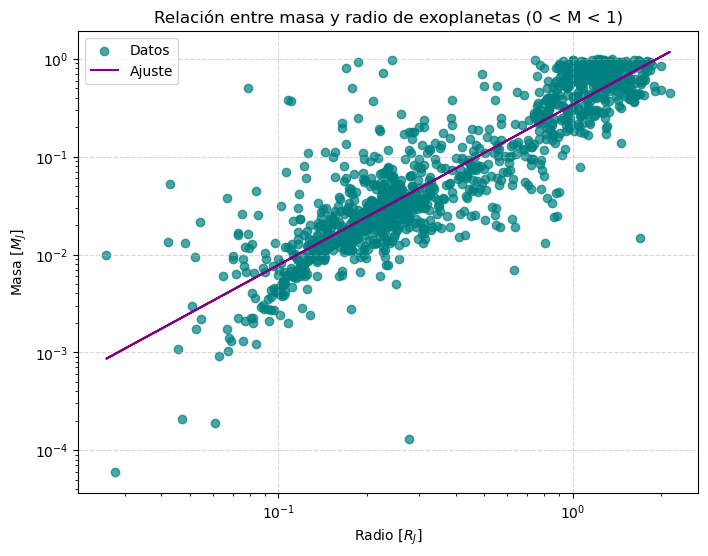

Pendiente (B): 1.6382628181461005
Intercepto log(A): -0.4685428778787431
A =  0.33998293764367205


In [29]:
df3 = results.copy()
df3 = df3.dropna(subset=["mass", "radius"])     
df3 = df3[((df3["mass"] > 1e-6)) & (df3["mass"] < 1) & (df3["radius"] > 0)]

x = np.log10(df3["radius"])  
y = np.log10(df3["mass"])    

# np.polyfit devuelve los coeficientes de la recta: y = m*x + b
m, b = np.polyfit(x, y, 1)

y_ajuste = m * x + b

plt.figure(figsize=(8,6))
plt.scatter(df3["radius"], df3["mass"], color="teal", alpha=0.7, label="Datos")
plt.plot(df3["radius"], 10**y_ajuste, color="purple", label=f"Ajuste")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Radio [$R_J$]")
plt.ylabel("Masa [$M_J$]")
plt.title("Relación entre masa y radio de exoplanetas (0 < M < 1)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.savefig("masa_radio_0-1.pdf")
plt.show()


print("Pendiente (B):", m)
print("Intercepto log(A):", b)
print("A = ", 10**b)


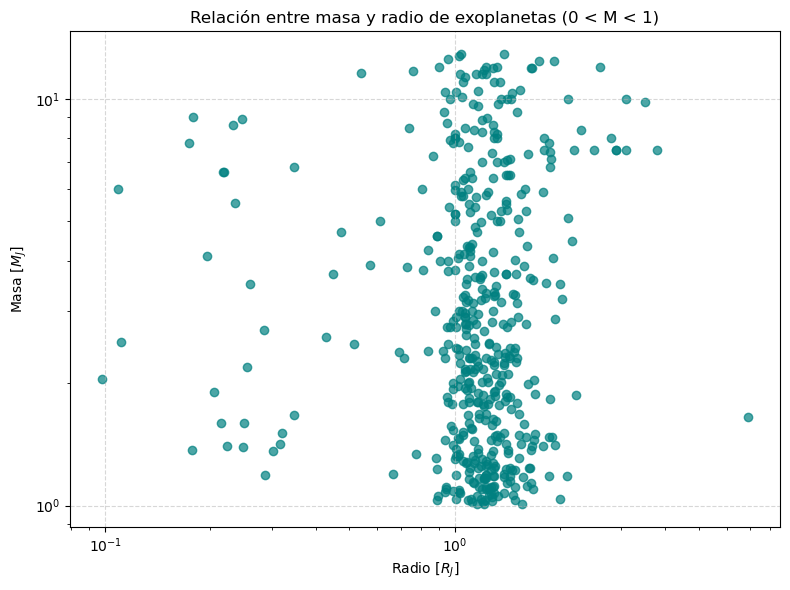

In [ ]:
df3 = results.copy()
df3 = df3.dropna(subset=["mass", "radius"])
df3 = df3[(df3["mass"] > 1) & (df3["mass"] < 13) & (df3["radius"] > 0)]


plt.figure(figsize=(8,6))
plt.scatter(df3["radius"], df3["mass"], alpha=0.7, color="teal")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Masa [$M_J$]")
plt.xlabel("Radio [$R_J$]")
plt.title("Relación entre masa y radio de exoplanetas (1 < M < 13)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
#plt.savefig("masa_radio.pdf")
plt.show()

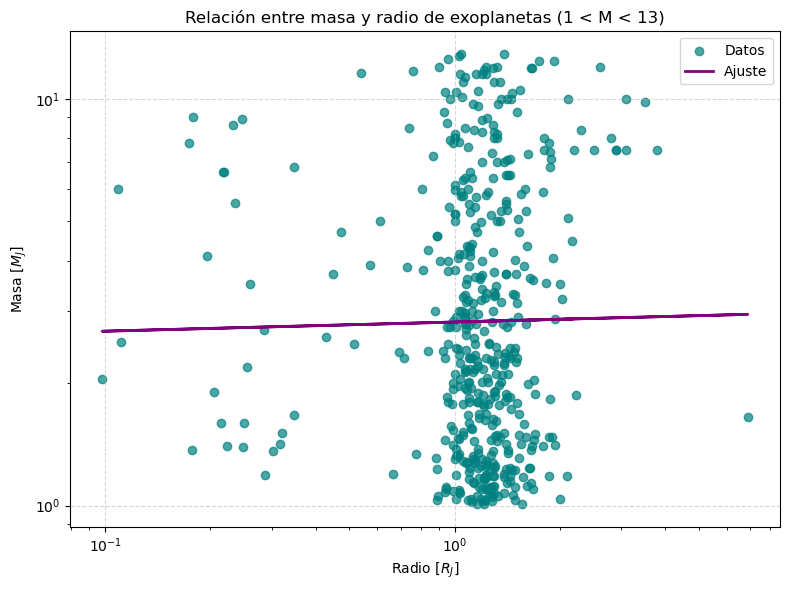

Pendiente (B): 0.022500081502294766
Intercepto log(A): 0.4512158642395897
A = 2.826284418594269


In [30]:
df3 = results.copy()
df3 = df3.dropna(subset=["mass", "radius"])      
df3 = df3[(df3["mass"] > 1) & (df3["mass"] < 13) & (df3["radius"] > 0)]

x = np.log10(df3["radius"])    
y = np.log10(df3["mass"])      

# np.polyfit devuelve los coeficientes de la recta: y = m*x + b
m, b = np.polyfit(x, y, 1)     # y = m*x + b  →  log(M) = m*log(R) + b

y_ajuste = m * x + b


plt.figure(figsize=(8,6))
plt.scatter(df3["radius"], df3["mass"], color="teal", alpha=0.7, label="Datos")
plt.plot(df3["radius"], 10**y_ajuste, color="purple", lw=2, label=f"Ajuste")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Radio [$R_J$]")
plt.ylabel("Masa [$M_J$]")
plt.title("Relación entre masa y radio de exoplanetas (1 < M < 13)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("masa_radio_1-13.pdf")
plt.show()


print("Pendiente (B):", m)
print("Intercepto log(A):", b)
print("A =", 10**b)


### Ejercicio 5
Se analiza la distribución de masas de los planetas en función de la edad de la estrella. Determine si
existe una relación entre ambas.

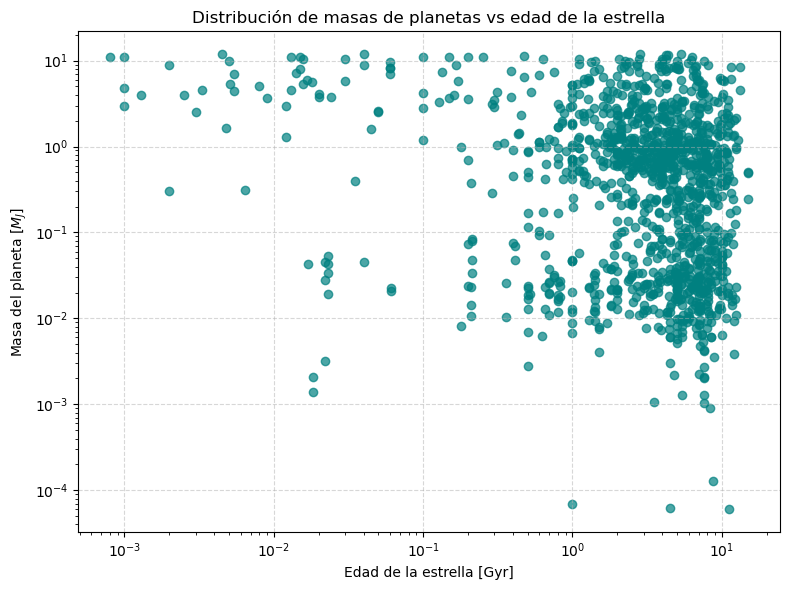

In [31]:
df4 = results.copy()
df4 = df4.dropna(subset=["star_age", "mass"])
df4 = df4[(df4["mass"] > 1e-6)& (df4["mass"] < 12)]

plt.figure(figsize=(8,6))
plt.scatter(df4["star_age"], df4["mass"], alpha=0.7, color="teal")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Edad de la estrella [Gyr]")
plt.ylabel("Masa del planeta [$M_J$]")
plt.title("Distribución de masas de planetas vs edad de la estrella")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("masa_edad(escala_log).pdf")
plt.show()

In [3]:
from scipy.stats import norm
norm.pdf(0.5)


np.float64(0.35206532676429947)

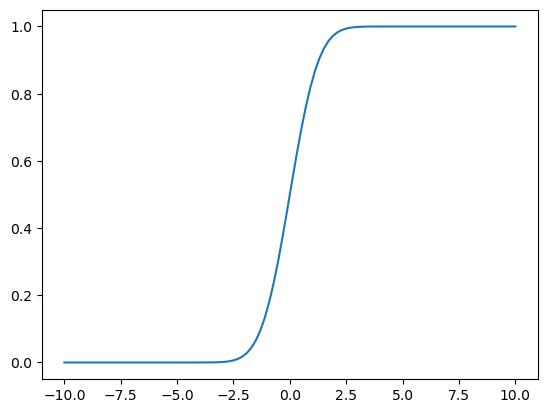

In [6]:
x = np.linspace(-10, 10, 100)
y = norm.cdf(x)
plt.plot(x, y)

In [7]:
alpha = 0.05
norm.ppf(alpha/2)

np.float64(-1.9599639845400545)

In [8]:
norm.ppf(1-alpha/2)

np.float64(1.959963984540054)